<a href="https://colab.research.google.com/github/Manohar4587/Gun_Object_Detection/blob/main/Copy_of_October.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 14.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
os.chdir('/content/drive/MyDrive/Gun_Object_Detection-main 2')

In [4]:
import json
import os
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

# Function to convert bounding box from (x, y, width, height) to YOLO format (x_center, y_center, width, height)
def convert_to_yolo_format(size, box):
    dw = 1. / size[0]  # width of the image
    dh = 1. / size[1]  # height of the image
    x_center = box['x'] + (box['width'] / 2.0)
    y_center = box['y'] + (box['height'] / 2.0)
    w = box['width']
    h = box['height']

    # Normalize and ensure within bounds [0, 1]
    x_center = max(0, min(1, x_center * dw))
    y_center = max(0, min(1, y_center * dh))
    w = max(0, min(1, w * dw))
    h = max(0, min(1, h * dh))

    return (x_center, y_center, w, h)

# Function to visualize YOLO bounding boxes
def visualize_bbox(image_path, yolo_box, size):
    img = cv2.imread(image_path)
    h, w = img.shape[:2]

    # Unnormalize YOLO format to image pixel coordinates
    x_center, y_center, bbox_width, bbox_height = yolo_box
    x_center, y_center, bbox_width, bbox_height = x_center * w, y_center * h, bbox_width * w, bbox_height * h
    x1 = int(x_center - (bbox_width / 2))
    y1 = int(y_center - (bbox_height / 2))
    x2 = int(x_center + (bbox_width / 2))
    y2 = int(y_center + (bbox_height / 2))

    # Draw rectangle
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Show image with bounding box
    cv2_imshow(img)

# Load your JSON annotation file
json_file = '/content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/images/train/gun_train_update_annot.json'

# Output directories for YOLO annotations and images
output_dir_labels = 'path_to_yolo_labels1/'
output_dir_images = '/content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/images/train'
os.makedirs(output_dir_labels, exist_ok=True)

# Open and read the JSON file
with open(json_file, 'r') as f:
    data = json.load(f)

# Iterate over the entries in the JSON file
for img_key, img_data in data.items():
    filename = img_data['filename']
    image_path = os.path.join(output_dir_images, filename)

    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        continue  # Skip this image if it's not found

    with Image.open(image_path) as img:
        width, height = img.size  # Automatically get the image width and height

    # Prepare the YOLO format annotation file
    label_file = os.path.join(output_dir_labels, f"{os.path.splitext(filename)[0]}.txt")

    # Open the label file for writing
    with open(label_file, 'w') as lf:
        # Iterate over the regions (bounding boxes)
        for region in img_data['regions']:
            try:
                box = region['shape_attributes']
                yolo_box = convert_to_yolo_format((width, height), box)
                lf.write(f"0 {' '.join(map(str, yolo_box))}\n")

                # Visualize bounding box on the image (optional)
                #visualize_bbox(image_path, yolo_box, (width, height))
            except KeyError as e:
                print(f"KeyError: {e} in {filename}")
                continue  # Skip if there's an error



In [5]:
import json
import os
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

# Function to convert bounding box from (x, y, width, height) to YOLO format (x_center, y_center, width, height)
def convert_to_yolo_format(size, box):
    dw = 1. / size[0]  # width of the image
    dh = 1. / size[1]  # height of the image
    x_center = box['x'] + (box['width'] / 2.0)
    y_center = box['y'] + (box['height'] / 2.0)
    w = box['width']
    h = box['height']

    # Normalize and ensure within bounds [0, 1]
    x_center = max(0, min(1, x_center * dw))
    y_center = max(0, min(1, y_center * dh))
    w = max(0, min(1, w * dw))
    h = max(0, min(1, h * dh))

    return (x_center, y_center, w, h)

# Function to visualize YOLO bounding boxes
def visualize_bbox(image_path, yolo_box, size):
    img = cv2.imread(image_path)
    h, w = img.shape[:2]

    # Unnormalize YOLO format to image pixel coordinates
    x_center, y_center, bbox_width, bbox_height = yolo_box
    x_center, y_center, bbox_width, bbox_height = x_center * w, y_center * h, bbox_width * w, bbox_height * h
    x1 = int(x_center - (bbox_width / 2))
    y1 = int(y_center - (bbox_height / 2))
    x2 = int(x_center + (bbox_width / 2))
    y2 = int(y_center + (bbox_height / 2))

    # Draw rectangle
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Show image with bounding box
    cv2_imshow(img)

# Load your JSON annotation file
json_file = '/content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/images/val/Gun_val_annot_update.json'
# Output directories for YOLO annotations and images
output_dir_labels = 'path_to_yolo_labels2/'
output_dir_images = '/content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/images/val'
os.makedirs(output_dir_labels, exist_ok=True)

# Open and read the JSON file
with open(json_file, 'r') as f:
    data = json.load(f)

# Iterate over the entries in the JSON file
for img_key, img_data in data.items():
    filename = img_data['filename']
    image_path = os.path.join(output_dir_images, filename)

    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        continue  # Skip this image if it's not found

    with Image.open(image_path) as img:
        width, height = img.size  # Automatically get the image width and height

    # Prepare the YOLO format annotation file
    label_file = os.path.join(output_dir_labels, f"{os.path.splitext(filename)[0]}.txt")

    # Open the label file for writing
    with open(label_file, 'w') as lf:
        # Iterate over the regions (bounding boxes)
        for region in img_data['regions']:
            try:
                box = region['shape_attributes']
                yolo_box = convert_to_yolo_format((width, height), box)
                lf.write(f"0 {' '.join(map(str, yolo_box))}\n")

                # Visualize bounding box on the image (optional)
                #visualize_bbox(image_path, yolo_box, (width, height))
            except KeyError as e:
                print(f"KeyError: {e} in {filename}")
                continue  # Skip if there's an error



In [6]:
from ultralytics import YOLO

# Load a YOLOv8 model (pretrained)
model = YOLO('yolov8s.pt')  # Switch to 'yolov8s.pt' for better accuracy with a small dataset

# Train the model on the custom dataset
results = model.train(
    data='/content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/data.yaml',  # path to the data yaml file
    epochs=10,  # Increased epochs for more training time
    imgsz=640,  # Reduced image size for stability
    batch=16,   # Increase batch size if hardware allows
    name='gun-detection',
    optimizer='AdamW',  # Use AdamW for stable convergence
    lr0=0.001,  # Lower learning rate for gradual training
    device='cpu'  # or 'gpu' if available
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=gun-detection36, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, v

100%|██████████| 755k/755k [00:00<00:00, 12.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/labels/train.cache... 247 images, 1 backgrounds, 4 corrupt: 100%|██████████| 248/248 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/images/train/Img189.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0015]
train: WARNING ⚠️ /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/images/train/Img190.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2993]
train: WARNING ⚠️ /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/images/train/Img244.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0366]
train: WARNING ⚠️ /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/images/train/Img249.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0605]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/Gun_300/dataset/labels/val.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]


Plotting labels to runs/detect/gun-detection36/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/gun-detection36
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      3.674      7.746      2.782          6        640: 100%|██████████| 16/16 [10:32<00:00, 39.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.33s/it]

                   all         45         53   0.000233     0.0377   0.000123   1.83e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G        3.6      4.398      2.526          4        640: 100%|██████████| 16/16 [09:50<00:00, 36.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.24s/it]

                   all         45         53   0.000444      0.113   0.000359   8.21e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      3.536      4.209      2.381          6        640: 100%|██████████| 16/16 [09:53<00:00, 37.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.91s/it]

                   all         45         53   0.000222     0.0566   0.000129   1.29e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      3.488      4.182      2.308          6        640: 100%|██████████| 16/16 [09:39<00:00, 36.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.13s/it]

                   all         45         53   0.000593      0.151   0.000701   0.000149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      3.473        4.1      2.324          4        640: 100%|██████████| 16/16 [09:43<00:00, 36.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.86s/it]

                   all         45         53   0.000519      0.132   0.000299   5.04e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      3.444      4.055      2.281          5        640: 100%|██████████| 16/16 [09:49<00:00, 36.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.31s/it]

                   all         45         53   0.000694       0.17   0.000434   8.73e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      3.399      4.076      2.352          4        640: 100%|██████████| 16/16 [09:50<00:00, 36.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:26<00:00, 13.35s/it]

                   all         45         53    0.00104      0.245   0.000833   0.000175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      3.289      4.033      2.263          3        640: 100%|██████████| 16/16 [09:50<00:00, 36.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.74s/it]

                   all         45         53   0.000621      0.151   0.000366   0.000102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      3.254      3.973       2.21          5        640: 100%|██████████| 16/16 [09:51<00:00, 36.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.74s/it]

                   all         45         53   0.000691      0.132   0.000463   0.000108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      3.308      3.931      2.235          4        640: 100%|██████████| 16/16 [09:53<00:00, 37.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.47s/it]

                   all         45         53   0.000889      0.132   0.000677   0.000143



10 epochs completed in 1.728 hours.
Optimizer stripped from runs/detect/gun-detection36/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/gun-detection36/weights/best.pt, 22.5MB

Validating runs/detect/gun-detection36/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.85s/it]


                   all         45         53    0.00104      0.245   0.000833   0.000175
Speed: 1.8ms preprocess, 507.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/gun-detection36



image 1/3 /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/test_images/Img60.jpg: 288x640 (no detections), 283.0ms
image 2/3 /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/test_images/Img82.jpg: 288x640 (no detections), 284.3ms
image 3/3 /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/test_images/Img88.jpg: 288x640 (no detections), 273.6ms
Speed: 2.2ms preprocess, 280.3ms inference, 0.6ms postprocess per image at shape (1, 3, 288, 640)


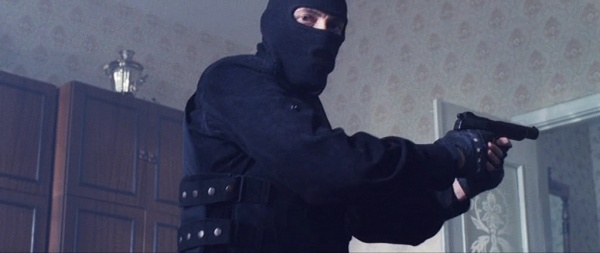

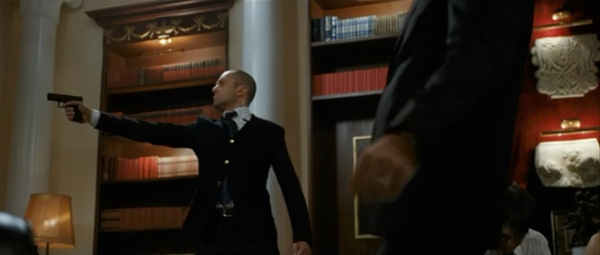

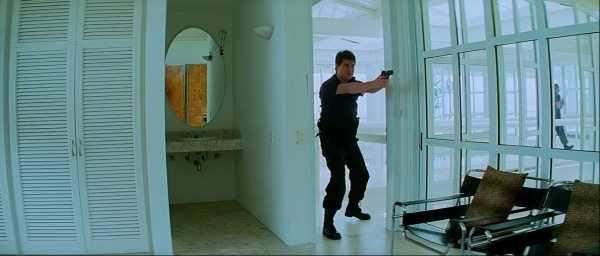

In [8]:
# Run inference on a test image
results = model('/content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/test_images', conf=0.25)  # Set a lower confidence threshold if needed
#results.show()  # Display the detection results

if isinstance(results, list):
    for result in results:
        result.show()  # Show each result if it's a list
else:
    results.show()

#results.save('path_to_output_folder/')  # Save results to a folder if required



image 1/3 /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/test_images/Img60.jpg: 288x640 1 person, 1 remote, 321.8ms
image 2/3 /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/test_images/Img82.jpg: 288x640 3 persons, 1 tie, 1 remote, 308.8ms
image 3/3 /content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/test_images/Img88.jpg: 288x640 2 persons, 1 cell phone, 302.7ms
Speed: 2.6ms preprocess, 311.1ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 640)


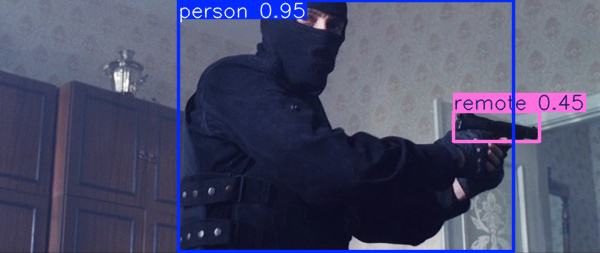

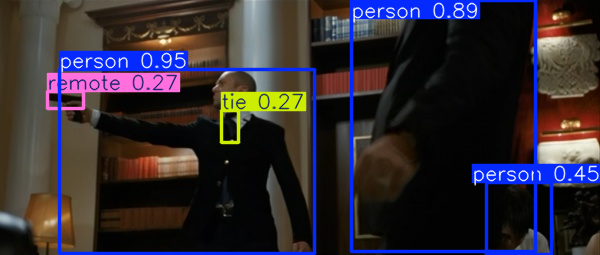

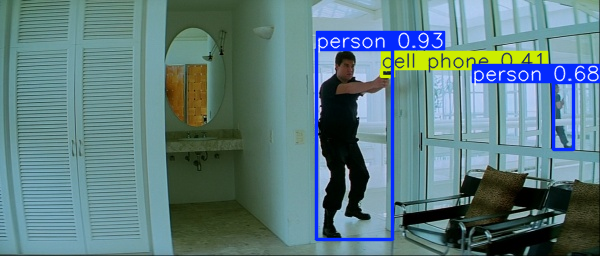

In [ ]:
from ultralytics import YOLO
# Load the trained YOLOv8 model (replace 'best.pt' with your actual model weights if different)
model = YOLO('runs/detect/gun-detection/weights/yolov8s.pt')  # Path to your trained model weights

# Perform inference on an image
results = model('/content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/test_images', conf=0.25)

# Display the results
#results.show()  # Display the image with bounding boxes

# Check if results is a list
if isinstance(results, list):
    for result in results:
        result.show()  # Show each result if it's a list
else:
    results.show()  # Show the single result if it's not a list


# Optionally, save the results
#results.save('/content/drive/My Drive/Gun_Object_Detection-main 2/Gun_Object_Detection-main/test_images/Img88.jpg')  # Save the results in an output folder

# If you want to get detailed information about detections:
#print(results.pandas().xyxy[0])  # Print the bounding box information
